In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

### Consider the grid 
### I. Define the states

In [44]:
# Parameters for the grid world
# grid_size = (5, 5)  # Define a 5x5 grid
# goal_state = (4, 4)  # Bottom-right corner as the goal
# obstacles = [(1, 2), (2, 3), (4, 1)]  # Define obstacles in some cells
# discount_factor = 0.9  # Discount factor
# threshold = 1e-4  # Convergence threshold

sz_grid = rand.randint(6,8)
grid_size = (sz_grid, sz_grid)
st_goalx = rand.randint(0,sz_grid-1)
st_goaly = rand.randint(0,sz_grid-1)
goal_state = (st_goalx, st_goaly)
obstacles = []
flag = True
nr_obst = 0
while(flag):
    obs_x = rand.randint(0,sz_grid-1)
    obs_y = rand.randint(0,sz_grid-1)
    if(obs_x != st_goalx & obs_y != st_goaly):
        if ((obs_x,obs_y) not in obstacles ):
            obstacles.append((obs_x,obs_y))
            nr_obst  = nr_obst+1
            if(nr_obst >= 3):
                flag = False

discount_factor = 0.9  # Discount factor
threshold = 1e-4  # Convergence threshold   

/var/folders/_b/1z83z14s1pj69nlrf9lf4gtr0000gp/T/ipykernel_92987/712499214.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, color='white', edgecolor='black'))
/var/folders/_b/1z83z14s1pj69nlrf9lf4gtr0000gp/T/ipykernel_92987/712499214.py:9: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, color='lightcoral', edgecolor='black'))
/var/folders/_b/1z83z14s1pj69nlrf9lf4gtr0000gp/T/ipykernel_92987/712499214.py:6: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, color='lightgreen', edgecolor='black'))


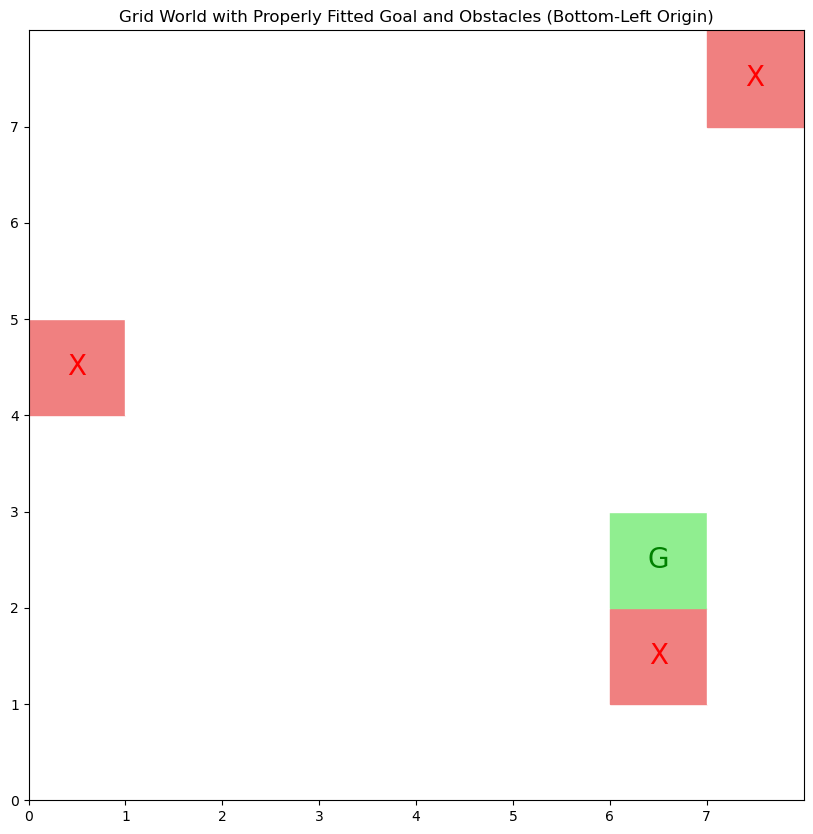

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if (i, j) == goal_state:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='lightgreen', edgecolor='black'))
            ax.text(j + 0.5, i + 0.5, 'G', ha='center', va='center', color='green', fontsize=20)
        elif (i, j) in obstacles:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='lightcoral', edgecolor='black'))
            ax.text(j + 0.5, i + 0.5, 'X', ha='center', va='center', color='red', fontsize=20)
        else:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='white', edgecolor='black'))

ax.set_xlim(0, grid_size[1])
ax.set_ylim(0, grid_size[0])
# Remove plt.gca().invert_yaxis() to keep (0,0) at the bottom-left
plt.xticks(range(grid_size[1]))
plt.yticks(range(grid_size[0]))
plt.title("Grid World with Properly Fitted Goal and Obstacles (Bottom-Left Origin)")

plt.show()


### II. Define the actions, transition probabilities, and reward function.

In [46]:
# Define the actions and their corresponding moves
actions = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1)
}

# Initialize value function and reward grid
value_function = np.zeros(grid_size)
reward_grid = np.zeros(grid_size)

# Assign rewards in the grid
reward_grid[goal_state] = 1
for obs in obstacles:
    reward_grid[obs] = -1

In [47]:
# Check if a state is within grid bounds and not an obstacle
def is_valid_state(state):
    i, j = state
    return 0 <= i < grid_size[0] and 0 <= j < grid_size[1] and state not in obstacles

# Apply value iteration to find the optimal value function
def value_iteration():
    while True:
        delta = 0
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                state = (i, j)
                if state == goal_state or state in obstacles:
                    continue  # Skip goal and obstacle states

                v = value_function[i, j]
                max_value = float('-inf')

                # Compute the value for each action
                for action in actions.values():
                    next_state = (i + action[0], j + action[1])
                    if is_valid_state(next_state):
                        value = reward_grid[next_state] + discount_factor * value_function[next_state]
                    else:
                        value = reward_grid[state] + discount_factor * value_function[state]  # Penalty for invalid move

                    max_value = max(max_value, value)

                value_function[i, j] = max_value
                delta = max(delta, abs(v - max_value))

        if delta < threshold:
            break

# Run value iteration
value_iteration()

# Step 3: Extract the optimal policy
policy = np.full(grid_size, '', dtype=object)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        state = (i, j)
        if state == goal_state or state in obstacles:
            continue

        best_action = None
        best_value = float('-inf')

        for action_name, action in actions.items():
            next_state = (i + action[0], j + action[1])
            if is_valid_state(next_state):
                value = reward_grid[next_state] + discount_factor * value_function[next_state]
            else:
                value = reward_grid[state] + discount_factor * value_function[state]

            if value > best_value:
                best_value = value
                best_action = action_name

        policy[i, j] = best_action




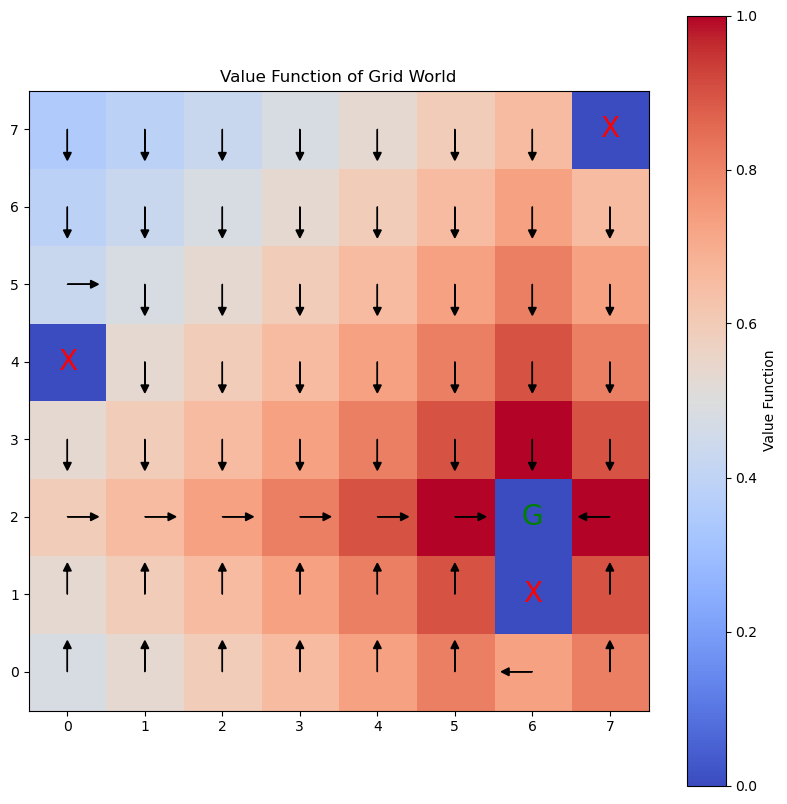

In [48]:
# Step 4: Visualization
plt.figure(figsize=(10, 10))
plt.imshow(value_function, cmap='coolwarm', origin='upper')
plt.colorbar(label="Value Function")
plt.title("Value Function of Grid World")

for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if policy[i, j] == 'up':
            plt.arrow(j, i, 0, -0.3, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'down':
            plt.arrow(j, i, 0, 0.3, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'left':
            plt.arrow(j, i, -0.3, 0, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'right':
            plt.arrow(j, i, 0.3, 0, head_width=0.1, head_length=0.1, color='black')

# Mark goal and obstacles
plt.text(goal_state[1], goal_state[0], 'G', ha='center', va='center', color='green', fontsize=20)
for obs in obstacles:
    plt.text(obs[1], obs[0], 'X', ha='center', va='center', color='red', fontsize=20)

plt.gca().invert_yaxis()
plt.show()


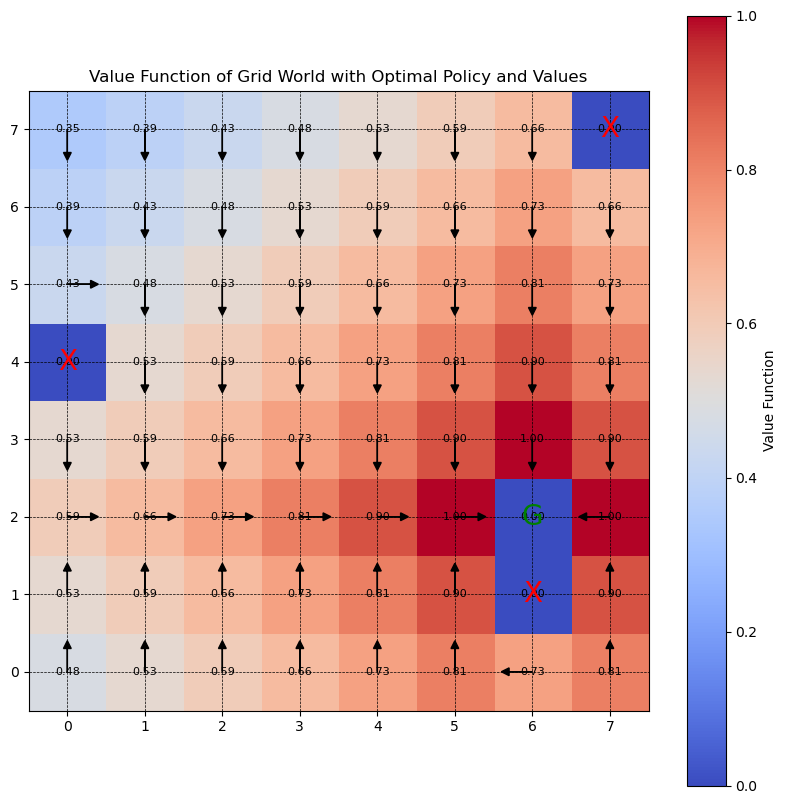

In [49]:
plt.figure(figsize=(10, 10))
plt.imshow(value_function, cmap='coolwarm', origin='upper')
plt.colorbar(label="Value Function")
plt.title("Value Function of Grid World with Optimal Policy and Values")

for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        # Display the value of each state in the cell
        plt.text(j, i, f"{value_function[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)

        # Display the optimal policy direction as arrows
        if policy[i, j] == 'up':
            plt.arrow(j, i, 0, -0.3, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'down':
            plt.arrow(j, i, 0, 0.3, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'left':
            plt.arrow(j, i, -0.3, 0, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'right':
            plt.arrow(j, i, 0.3, 0, head_width=0.1, head_length=0.1, color='black')

# Mark the goal state and obstacles
plt.text(goal_state[1], goal_state[0], 'G', ha='center', va='center', color='green', fontsize=20)
for obs in obstacles:
    plt.text(obs[1], obs[0], 'X', ha='center', va='center', color='red', fontsize=20)

plt.gca().invert_yaxis()
plt.xticks(range(grid_size[1]))
plt.yticks(range(grid_size[0]))
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.show()